In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('../data/all_seasons.csv', parse_dates=['season'])
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [28]:
df['Unnamed: 0'] = False

In [29]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
df.team_abbreviation.value_counts()

CLE    411
TOR    408
LAC    408
MIA    405
HOU    402
DAL    401
PHI    401
ATL    400
WAS    399
SAS    395
GSW    393
DEN    392
LAL    390
MIL    390
ORL    390
IND    390
NYK    389
CHI    386
BOS    385
POR    383
MIN    382
SAC    378
PHX    377
UTA    377
DET    375
MEM    330
CHA    271
NJN    257
OKC    213
SEA    182
BKN    163
NOH    143
NOP    141
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64

# EDA

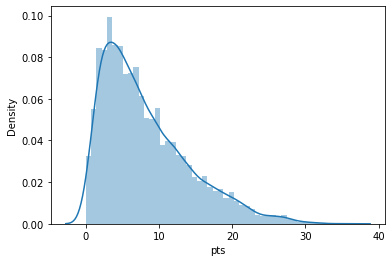

In [31]:
sns.distplot(df.pts);

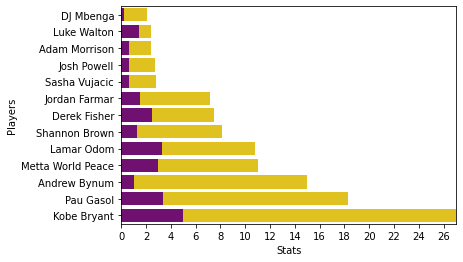

In [32]:
lakers = df[df.team_abbreviation == 'LAL']
lakers = lakers[lakers.season == '2009-10']
plot = plt.subplots()
plot = sns.barplot(x='pts', y='player_name', data=lakers, order=lakers.sort_values('pts').player_name, color='gold')
plot = sns.barplot(x='ast', y='player_name', data=lakers, order=lakers.sort_values('pts').player_name, color='purple')
plot.set(xlabel='Stats', ylabel='Players')
plot.set_xlim(0,int(np.max(lakers.pts)))
plot.set_xticks(range(0, int(np.max(lakers.pts)), 2));
plt.show()

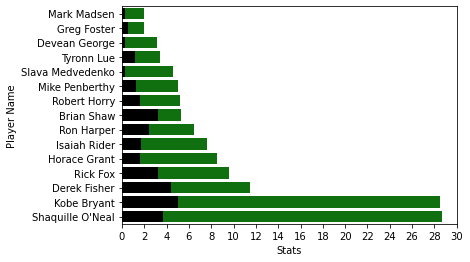

In [33]:
plyr_20_21_mil =  df[df["season"] == '2000-01']
plyr_20_21_mil = plyr_20_21_mil[plyr_20_21_mil["team_abbreviation"] == "LAL"]

plot = plt.subplots()
plot = sns.barplot(x = "pts", y ="player_name",data = plyr_20_21_mil, order = plyr_20_21_mil.sort_values("pts").player_name,
            color = "g")

plot = sns.barplot(x = "ast", y ="player_name",data = plyr_20_21_mil, order = plyr_20_21_mil.sort_values("pts").player_name,
          color = "black")
plot.set(xlabel="Stats", ylabel="Player Name")
plot.set_xlim(0,30)
plot.set_xticks(range(0,31,2))
plt.show()

In [34]:
def plot_team_season(team_abbv, season):
    team = df[df['season'] == season]
    team = team[team['team_abbreviation'] == team_abbv]
    plot = plt.subplots(figsize=(10, 6))
    plot = sns.barplot(x='pts', y='player_name', data=team, order=team.sort_values('pts').player_name, color='royalblue')
    plt.show()

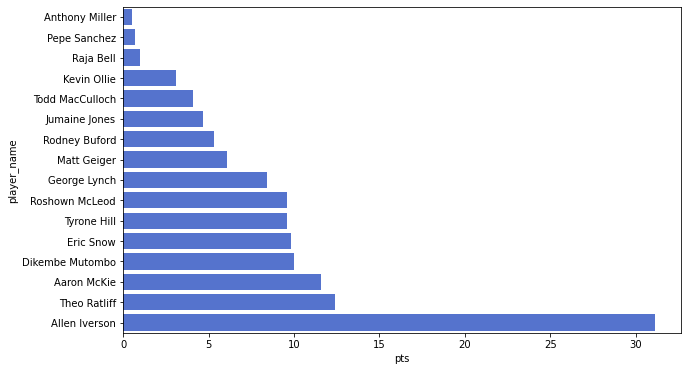

In [37]:
plot_team_season("PHI", '2000-01')

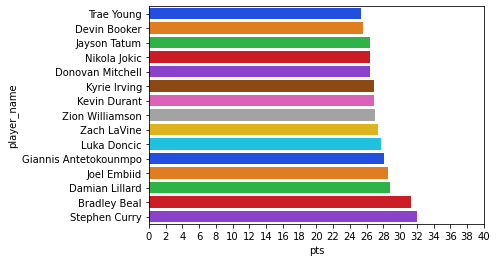

In [38]:
plyr_20_21 =  df[df["season"] == '2020-21']
plyr_20_21 = plyr_20_21.sort_values("pts",ascending = False)
plyr_20_21 = plyr_20_21[:15]

plot1 = sns.barplot(x = "pts", y ="player_name",data = plyr_20_21, order = plyr_20_21.sort_values("pts").player_name, 
            palette = 'bright')
plot1.set_xlim(0,40)
plot1.set_xticks(range(0,41,2))
plt.show()

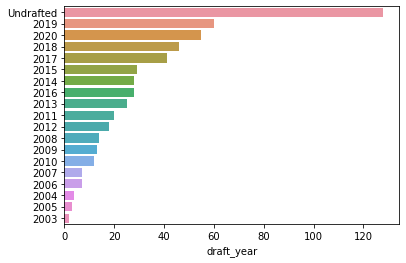

In [39]:
sns.barplot(y=df.loc[df.season=='2020-21'].draft_year.value_counts().index,x=df.loc[df.season=='2020-21'].draft_year.value_counts());

In [40]:
def show_top_n_by_stat(stat, n):
    players = df[df.season == '2020-21']
    players = players.sort_values(stat, ascending=False)
    players = players[:n]
    plot = sns.barplot(x=stat, y='player_name', data=players, order=players.sort_values(stat).player_name, palette='Pastel1')
    plot.set_ylabel('Players')
    plot.set_xlim(0, int(np.max(players[stat])))
    plot.set_xticks(range(0, int(np.max(players[stat]))+1,2))
    plt.show()

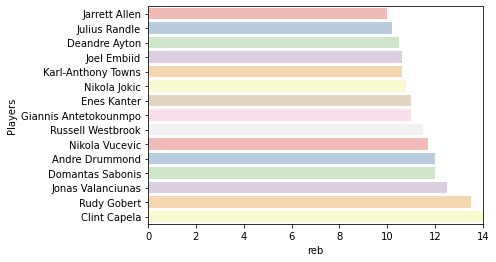

In [41]:
show_top_n_by_stat('reb', 15)

In [42]:
def plot_team_pts_reb_ast(team):
    fig, (ax, ax1, ax2) = plt.subplots(nrows=3,
                                       ncols=1,
                                      figsize=(8, 12),
                                      sharex=True)

    scatter = ax.scatter(df.age[df.team_abbreviation == team],
               df.pts[df.team_abbreviation == team],
               color='coral')
    ax.set_ylabel('Points Per Game')
    ax.axhline(df.pts[df.team_abbreviation == team].mean(), linestyle='--', color='dodgerblue')
    ax.set(title='PPG')
    
    scatter= ax1.scatter(df.age[df.team_abbreviation == team],
                     df.reb[df.team_abbreviation == team],
                     color='forestgreen')
    ax1.set_ylabel('Rebounds Per Game')
    ax1.axhline(df.reb[df.team_abbreviation == team].mean(), linestyle='--', color='firebrick')
    ax1.set(title='RPB')

    scatter = ax2.scatter(df.age[df.team_abbreviation == team],
                     df.ast[df.team_abbreviation == team],
                     color='cyan')
    ax2.set_ylabel('Assists Per Game')
    ax2.axhline(df.ast[df.team_abbreviation == team].mean(), linestyle='--', color='salmon')
    ax2.set(title='APG')
    

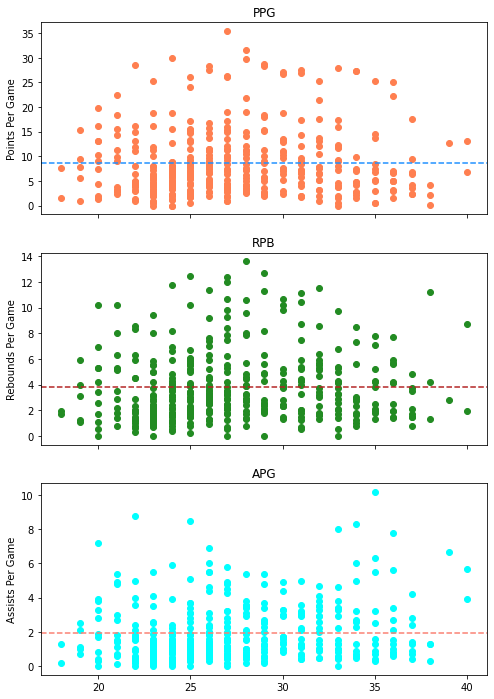

In [43]:
plot_team_pts_reb_ast('LAL')

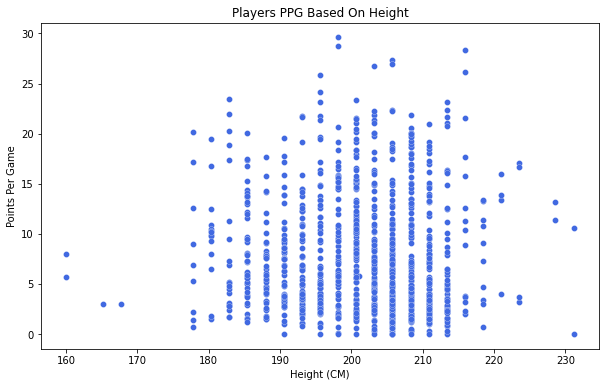

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plt.scatter(df.player_height[:1000], df.pts[:1000], c='royalblue', edgecolors='white', linewidths=0.25)
plt.ylabel('Points Per Game')
plt.xlabel('Height (CM)')
plt.title('Players PPG Based On Height');

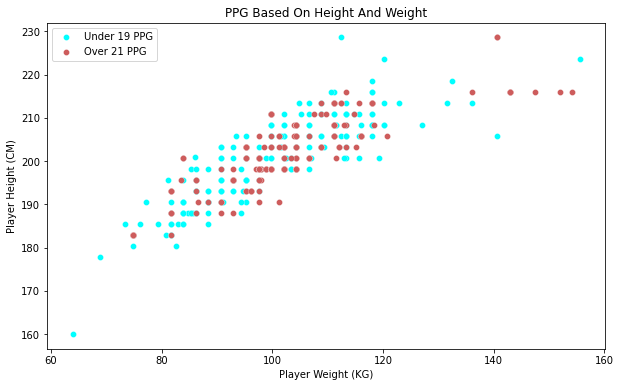

In [45]:
plt.figure(figsize=(10, 6))


plt.scatter(df.player_weight[df.pts <= 19][:200],
           df.player_height[df.pts <= 19][:200],
           c='aqua',
           linewidths=0.25,
           edgecolors='white')


plt.scatter(df.player_weight[df.pts > 21][:200],
           df.player_height[df.pts > 21][:200],
           c='indianred',
           linewidths=0.25,
           edgecolors='white')

plt.xlabel('Player Weight (KG)')
plt.ylabel('Player Height (CM)')
plt.legend(['Under 19 PPG', 'Over 21 PPG']);
plt.title('PPG Based On Height And Weight');

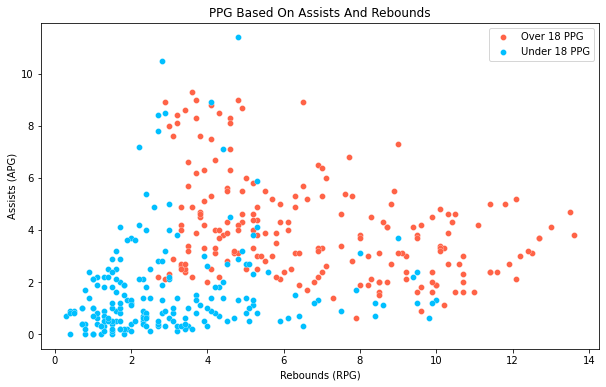

In [46]:
plt.figure(figsize=(10, 6))

plt.scatter(df.reb[df.pts > 18][:200],
           df.ast[df.pts > 18][:200],
           c='tomato',
           edgecolors='white',
           linewidths=0.25)

plt.scatter(df.reb[df.pts <= 18][:200],
           df.ast[df.pts <= 18][:200],
           c='deepskyblue',
           edgecolors='white',
           linewidths=0.25)

plt.xlabel('Rebounds (RPG)')
plt.ylabel('Assists (APG)')
plt.legend(['Over 18 PPG', 'Under 18 PPG'])
plt.title('PPG Based On Assists And Rebounds');

# Preprocessing Data

In [47]:
def preprocess_data(df):
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
    
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [48]:
df_tmp = preprocess_data(df)

In [49]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  int16  
 1   team_abbreviation  11700 non-null  int8   
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  int16  
 6   country            11700 non-null  int8   
 7   draft_year         11700 non-null  int8   
 8   draft_round        11700 non-null  int8   
 9   draft_number       11700 non-null  int8   
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

# Splitting Data

In [50]:
X = df_tmp.drop('pts', axis=1)
y = df_tmp.pts

In [51]:
train_split = round(0.7 * len(df_tmp))
valid_split = round(train_split + 0.15 * len(df_tmp))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Modelling

In [52]:
%%time
models = {
    'RandomForestRegressor':RandomForestRegressor(),
    'SVR':SVR(kernel='linear'),
    'ElasticNet':ElasticNet()
}

base_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    base_scores[name] = model.score(X_test, y_test)

KeyboardInterrupt: 

In [53]:
model = RandomForestRegressor(n_jobs=-1, max_samples=1000)

In [54]:
model.fit(df_tmp.drop('pts', axis=1), df_tmp.pts)

RandomForestRegressor(max_samples=1000, n_jobs=-1)

In [55]:
model.score(df_tmp.drop('pts', axis=1), df_tmp.pts)

0.9561812021789481

# Evaluation function

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error

def rsmle(y_true, y_preds):
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {
        'Training R2':r2_score(y_train, train_preds),
        'Valid R2': r2_score(y_valid, valid_preds),
        'Training RSMLE':rsmle(y_train, train_preds),
        'Valid RSMLE':rsmle(y_valid, valid_preds),
        'Training MAE':mean_absolute_error(y_train, train_preds),
        'Valid MAE':mean_absolute_error(y_valid, valid_preds)
    }
    return scores

In [57]:
show_scores(model)

{'Training R2': 0.9588143045550821,
 'Valid R2': 0.9445843740500387,
 'Training RSMLE': 0.15386747603606765,
 'Valid RSMLE': 0.16147977450672263,
 'Training MAE': 0.8635297924297926,
 'Valid MAE': 0.93642849002849}

# Hyperparameter tuning

In [58]:
rf_grid = {
    'n_estimators':np.arange(100, 1000, 100),
    'max_depth':[None, 3, 5],
    'max_features':['auto', 'log2', 'sqrt'],
    'min_samples_leaf':np.arange(1, 20, 2),
    'min_samples_split':np.arange(2, 20, 2)
}

In [59]:
%%time
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                             param_distributions=rf_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 4min 46s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [60]:
rs_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

In [61]:
ideal_model = RandomForestRegressor(n_estimators=700,
                                   min_samples_leaf=9,
                                   min_samples_split=16,
                                   max_depth=None,
                                   max_features='auto')
%time ideal_model.fit(X_train, y_train)

Wall time: 34.4 s


RandomForestRegressor(min_samples_leaf=9, min_samples_split=16,
                      n_estimators=700)

In [62]:
show_scores(model)

{'Training R2': 0.9588143045550821,
 'Valid R2': 0.9445843740500387,
 'Training RSMLE': 0.15386747603606765,
 'Valid RSMLE': 0.16147977450672263,
 'Training MAE': 0.8635297924297926,
 'Valid MAE': 0.9364284900284899}

In [63]:
show_scores(ideal_model)

{'Training R2': 0.9781657912055095,
 'Valid R2': 0.9390592606121911,
 'Training RSMLE': 0.10619168474881437,
 'Valid RSMLE': 0.15586198786846667,
 'Training MAE': 0.5919660215974097,
 'Valid MAE': 0.9375719672063394}

# Making predictions on test data

In [64]:
test_preds = ideal_model.predict(X_test)

In [65]:
len(test_preds)

1755

In [72]:
df_preds = pd.DataFrame()
df_preds['player_name'] = df.player_name[-len(X_test):]
df_preds['ppg'] =test_preds
df_preds.head(30)

,player_name,ppg
9945,Marcin Gortat,9.889886
9946,Marco Belinelli,10.873724
9947,Marcus Georges-Hunt,1.755962
9948,Marcus Morris Sr.,12.297661
9949,Marcus Paige,2.832504
9950,Marcus Smart,10.288019
9951,Mario Chalmers,8.911046
9952,Mario Hezonja,10.343575
9953,Malik Monk,4.826546
9954,Lonzo Ball,8.334710


In [73]:
df_preds.to_csv('../data/PPG-prediction.csv')

# Feature Importance

In [68]:
def plot_features(col, importance, n=20):
    df = pd.DataFrame({'feature':col,
                     'feature_importance':importance}).sort_values('feature_importance', ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df['feature'][:20], df['feature_importance'][:20], color='deeppink')
    ax.invert_yaxis()
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')
    ax.set_title('Feature Importances')

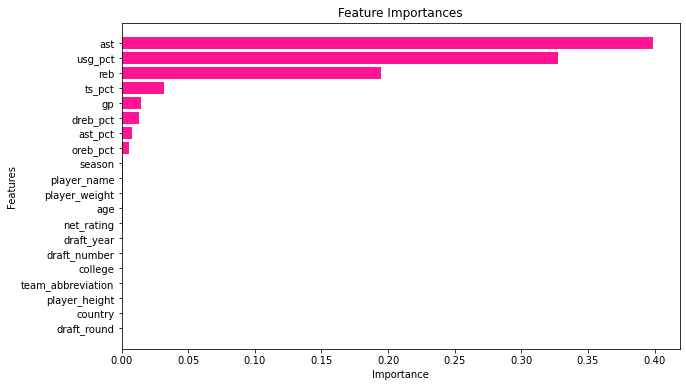

In [69]:
plot_features(X_test.columns, ideal_model.feature_importances_, 10000)